In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/california-house-loan-data/loan_data (1).csv


# Load the dataset from the directory

In [2]:
data = pd.read_csv('../input/california-house-loan-data/loan_data (1).csv')

In [3]:
#Peek the data

data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# Assign the X and y values from the data

X = data.drop('TARGET', axis=1)
y = data.TARGET

In [5]:
X.shape, y.shape

((307511, 121), (307511,))

In [6]:
X.head(2)

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
y.head(2)

0    1
1    0
Name: TARGET, dtype: int64

In [8]:
target_counts = y.value_counts()
target_counts

0    282686
1     24825
Name: TARGET, dtype: int64

In [9]:
# Percentage of default to the payer

default_percentage = target_counts[1]/target_counts.sum()

print(f'The default percentage of loan is {default_percentage.round(3)*100}%')


The default percentage of loan is 8.1%


# Preprocess the data

In [10]:
# Check for Null values

print(list(X.isna().sum()))

[0, 0, 0, 0, 0, 0, 0, 0, 12, 278, 1292, 0, 0, 0, 0, 0, 0, 0, 0, 0, 202929, 0, 0, 0, 0, 0, 0, 96391, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 173378, 660, 60965, 156061, 179943, 150007, 204488, 214865, 163891, 154828, 153020, 208642, 182590, 210199, 154350, 213514, 169682, 156061, 179943, 150007, 204488, 214865, 163891, 154828, 153020, 208642, 182590, 210199, 154350, 213514, 169682, 156061, 179943, 150007, 204488, 214865, 163891, 154828, 153020, 208642, 182590, 210199, 154350, 213514, 169682, 210295, 154297, 148431, 156341, 145755, 1021, 1021, 1021, 1021, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 41519, 41519, 41519, 41519, 41519, 41519]


In [11]:
X.dropna(axis=1, inplace=True)

In [12]:
X.shape, y.shape

((307511, 54), (307511,))

In [13]:
import seaborn as sns

In [14]:
print(((X.corr().abs())>0.7).sum().to_string())

SK_ID_CURR                     1
CNT_CHILDREN                   1
AMT_INCOME_TOTAL               1
AMT_CREDIT                     1
REGION_POPULATION_RELATIVE     1
DAYS_BIRTH                     1
DAYS_EMPLOYED                  2
DAYS_REGISTRATION              1
DAYS_ID_PUBLISH                1
FLAG_MOBIL                     1
FLAG_EMP_PHONE                 2
FLAG_WORK_PHONE                1
FLAG_CONT_MOBILE               1
FLAG_PHONE                     1
FLAG_EMAIL                     1
REGION_RATING_CLIENT           2
REGION_RATING_CLIENT_W_CITY    2
HOUR_APPR_PROCESS_START        1
REG_REGION_NOT_LIVE_REGION     1
REG_REGION_NOT_WORK_REGION     2
LIVE_REGION_NOT_WORK_REGION    2
REG_CITY_NOT_LIVE_CITY         1
REG_CITY_NOT_WORK_CITY         2
LIVE_CITY_NOT_WORK_CITY        2
FLAG_DOCUMENT_2                1
FLAG_DOCUMENT_3                1
FLAG_DOCUMENT_4                1
FLAG_DOCUMENT_5                1
FLAG_DOCUMENT_6                1
FLAG_DOCUMENT_7                1
FLAG_DOCUM

In [15]:
df_corr1 = ((X.corr().abs()))>0.8
df_corr2 = ((X.corr().abs()))<1

(df_corr1&df_corr2).sum()

SK_ID_CURR                     0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  1
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 1
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
REGION_RATING_CLIENT           1
REGION_RATING_CLIENT_W_CITY    1
HOUR_APPR_PROCESS_START        0
REG_REGION_NOT_LIVE_REGION     0
REG_REGION_NOT_WORK_REGION     1
LIVE_REGION_NOT_WORK_REGION    1
REG_CITY_NOT_LIVE_CITY         0
REG_CITY_NOT_WORK_CITY         1
LIVE_CITY_NOT_WORK_CITY        1
FLAG_DOCUMENT_2                0
FLAG_DOCUMENT_3                0
FLAG_DOCUMENT_4                0
FLAG_DOCUMENT_5                0
FLAG_DOCUMENT_6                0
FLAG_DOCUMENT_7                0
FLAG_DOCUM

In [16]:
# Drop highly correlated features
X.drop(['FLAG_EMP_PHONE', 'REGION_RATING_CLIENT_W_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'LIVE_REGION_NOT_WORK_REGION'], axis=1, inplace=True)

In [17]:
X.shape

(307511, 50)

### One - Hot Encoding

In [18]:
X = pd.get_dummies(X)

In [19]:
X.shape, y.shape

((307511, 139), (307511,))

<BarContainer object of 2 artists>

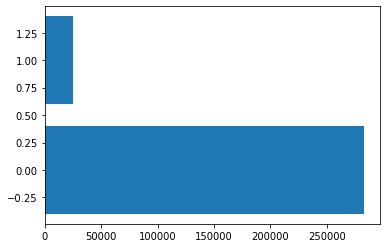

In [20]:
# Plot the target data

import matplotlib.pyplot as plt

plt.barh(target_counts.index, target_counts.values)

# As the data is imbalanced, now we will balance the data

In [21]:
X.shape

(307511, 139)

In [22]:
from imblearn.over_sampling import SMOTE

In [23]:
oversample = SMOTE()

X, y = oversample.fit_resample(X, y)

In [24]:
X.shape, y.shape

((565372, 139), (565372,))

# Make the model

In [25]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [26]:
# train_test split

from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=21)

In [27]:
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((395760, 139), (169612, 139), (395760,), (169612,))

In [28]:
model = keras.Sequential()

model.add(layers.Dense(12, input_dim=Xtrain.shape[1], activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(6, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='sgd', loss='binary_crossentropy', metrics='accuracy')

2022-06-07 06:58:35.747560: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-07 06:58:35.846004: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-07 06:58:35.846956: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-07 06:58:35.848328: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                1680      
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 1,845
Trainable params: 1,845
Non-trainable params: 0
_________________________________________________________________


In [30]:
history = model.fit(Xtrain, ytrain, batch_size=500, epochs=200, validation_split=0.2, verbose=1)

2022-06-07 06:58:39.496487: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/200
634/634 [==============================] - 4s 4ms/step - loss: 0.7048 - accuracy: 0.4987 - val_loss: 0.6931 - val_accuracy: 0.5019
Epoch 2/200
634/634 [==============================] - 2s 3ms/step - loss: 0.6932 - accuracy: 0.5003 - val_loss: 0.6932 - val_accuracy: 0.4981
Epoch 3/200
634/634 [==============================] - 2s 3ms/step - loss: 0.6932 - accuracy: 0.4998 - val_loss: 0.6932 - val_accuracy: 0.4981
Epoch 4/200
634/634 [==============================] - 2s 3ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.4981
Epoch 5/200
634/634 [==============================] - 2s 4ms/step - loss: 0.6932 - accuracy: 0.4998 - val_loss: 0.6932 - val_accuracy: 0.4981
Epoch 6/200
634/634 [==============================] - 2s 3ms/step - loss: 0.6932 - accuracy: 0.5010 - val_loss: 0.6932 - val_accuracy: 0.4981
Epoch 7/200
634/634 [==============================] - 2s 3ms/step - loss: 0.6932 - accuracy: 0.4996 - val_loss: 0.6932 - val_accuracy: 0.4981